In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [8]:
plt.style.available
plt.style.use('default')

In [9]:
raw_mobility = pd.read_csv('applemobilitytrends-2020-04-27.csv')

In [78]:
mobility = raw_mobility.melt(['region', 'transportation_type', 'geo_type', 'alternative_name'], value_name = 'value', var_name = 'date')

mobility.index = pd.to_datetime(mobility['date'])
mobility['value'] = mobility['value'].apply(lambda v: v-100)

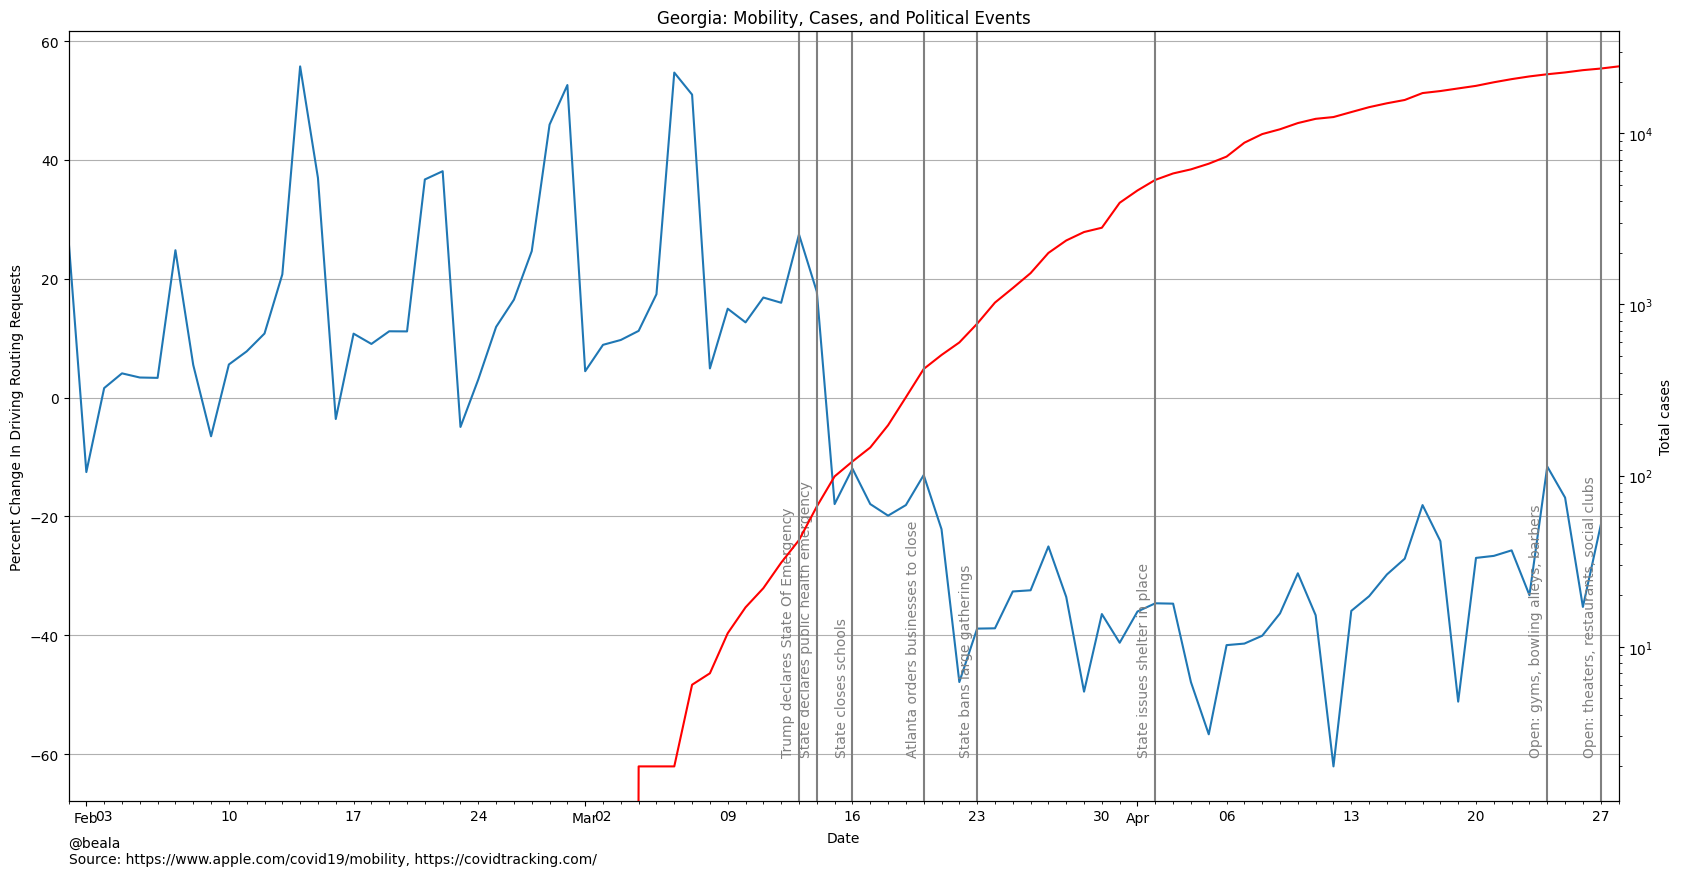

<Figure size 640x480 with 0 Axes>

In [96]:
ga = mobility[mobility['region'] == "Georgia"]['value'].copy()
ax = ga.plot(
        figsize = (20,10),
        title = 'Georgia: Mobility, Cases, and Political Events')
plt.grid(axis='y')
ax.twinx()

ga_positives = states[states['state'] == 'GA']['positive'].copy()

ga_positives[pd.to_datetime('2020-02-01')] = 0

ax2 = ga_positives.plot(
    figsize=(20,10),
    color="red")
ax2.set_ylabel("Total cases")
ax2.set_yscale('log')
def event(date, label):
    plt.axvline(x=pd.to_datetime(date), color='grey')
    ax.text(pd.to_datetime(date) - pd.to_timedelta('1 day'), -60, label, rotation=90, color='grey')

event('2020-03-13', 'Trump declares State Of Emergency')
event('2020-03-14', 'State declares public health emergency')
event('2020-03-16', 'State closes schools')
event('2020-03-20', 'Atlanta orders businesses to close')
event('2020-03-23', 'State bans large gatherings')
event('2020-04-02', 'State issues shelter in place')
event('2020-04-24', 'Open: gyms, bowling alleys, barbers')
event('2020-04-27', 'Open: theaters, restaurants, social clubs')
#event('2020-04-30', 'Shelter in place expires')
ax.set_xlabel("Date")
ax.set_ylabel("Percent Change In Driving Routing Requests")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
#plt.figure().autofmt_xdate()

ax.text(
    0,
    -0.08,
    "@beala\nSource: https://www.apple.com/covid19/mobility, https://covidtracking.com/",
    transform=ax.transAxes
)
plt.show()
plt.savefig("ga_mobility.png")

In [16]:
!ls ../covid-tracking-data/data/states_daily_4pm_et.csv
states = pd.read_csv("../covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates = ['date'], index_col = 'date')

../covid-tracking-data/data/states_daily_4pm_et.csv


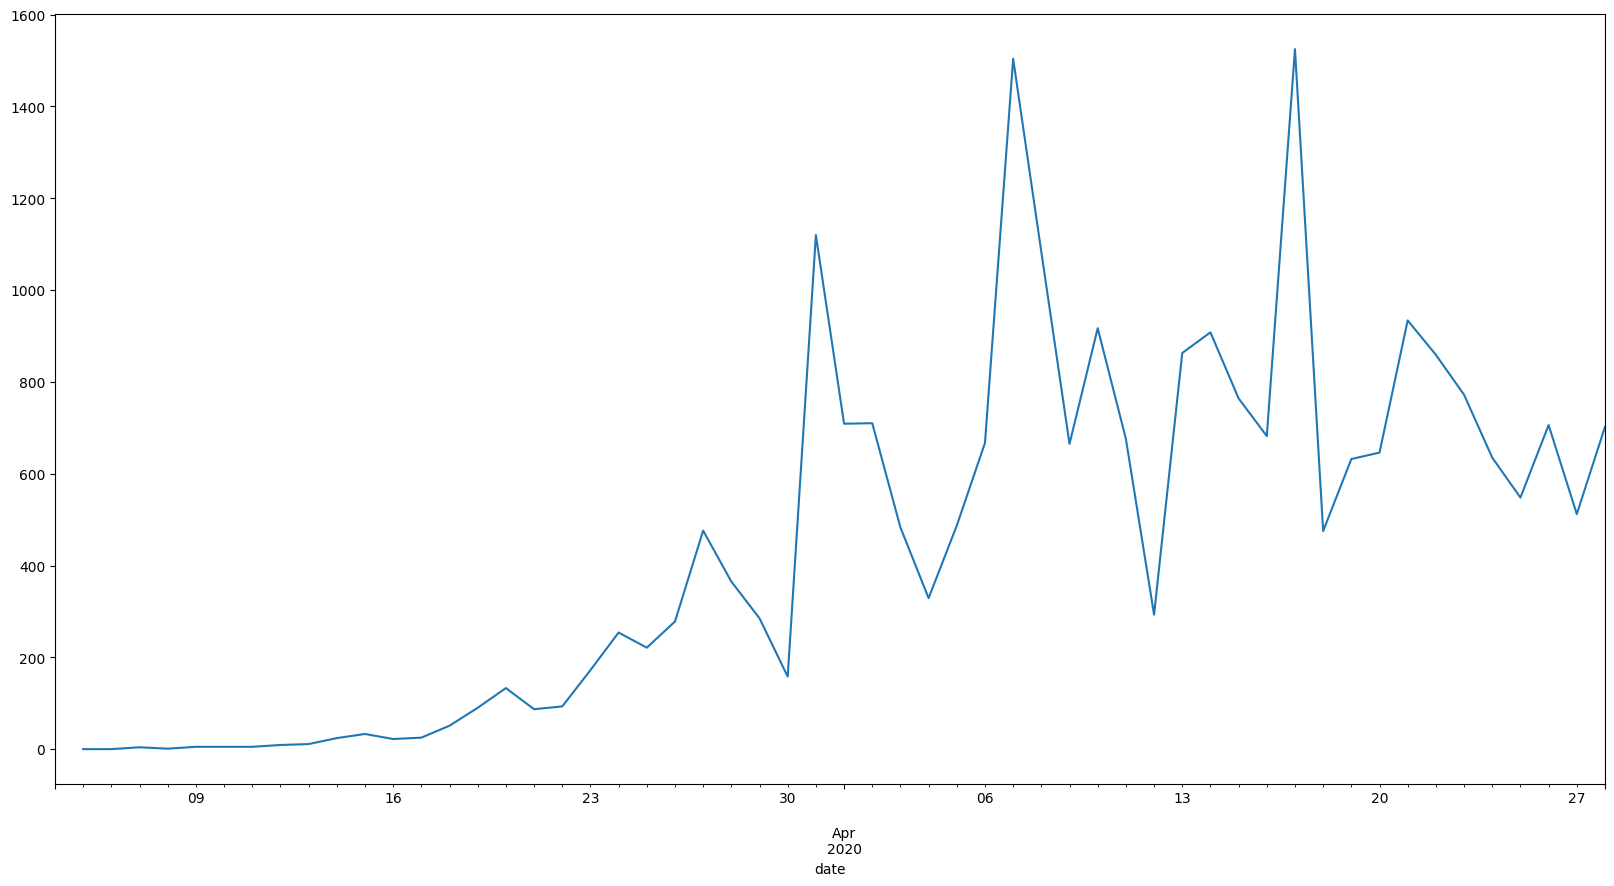

In [19]:
states[states['state'] == 'GA']['positiveIncrease'].plot(
    figsize=(20,10))